<a href="https://colab.research.google.com/github/stevecwb/Resist-ncia-dos-Materiais/blob/main/Segunda_Atividade_Computacional_(C2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM423 - Atividade Computacional II

Estevão Sanches Rodrigues, 168030

# Questão 1

## Bibliotecas Importadas

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## Definição de funções

In [193]:
def linear_func(x,a,b):
  # definição da equação da reta (função linear)
  y = a*x+b
  return y

## Dados Iniciais da Questão 1

In [194]:
comprimento_inicial = 110.0 # mm
diametro_inicial = 26.0 # mm

dados_e = [[0, 0, 0], 
           [0.011, -0.9, 18.26], 
           [0.033, -2.7, 36.53], 
           [0.105, -8.6, 109.6], 
           [0.182, -15, 182.7], 
           [0.215, -17.7, 219.3],
           [0.237, -19.6, 235.8],
           [0.259, -22.2, 244.9],
           [0.297, -26.7, 248.6],
           [0.347, -32.5, 252.2],
           [0.495, -50, 255.9],
           [0.561, -58, 263.2],
           [0.715, -76, 277.8],
           [1.27, -140, 307.0],
           [1.85, -207, 336.3],
           [2.79, -315, 365.5],
           [6.09, -683, 409.4]]

df = pd.DataFrame(dados_e, columns = ['Deslocamento longitudinal [mm]', 'Deslocamento lateral [μm]', 'Carga [kN]'])
df.head()

,Deslocamento longitudinal [mm],Deslocamento lateral [μm],Carga [kN]
0,0.000,0.0,0.00
1,0.011,-0.9,18.26
2,0.033,-2.7,36.53
3,0.105,-8.6,109.60
4,0.182,-15.0,182.70


## Letra A e B:

### Diagrama de Tensão-Deformação:

Text(0.5, 1.0, 'Tensão Pela Deformação')

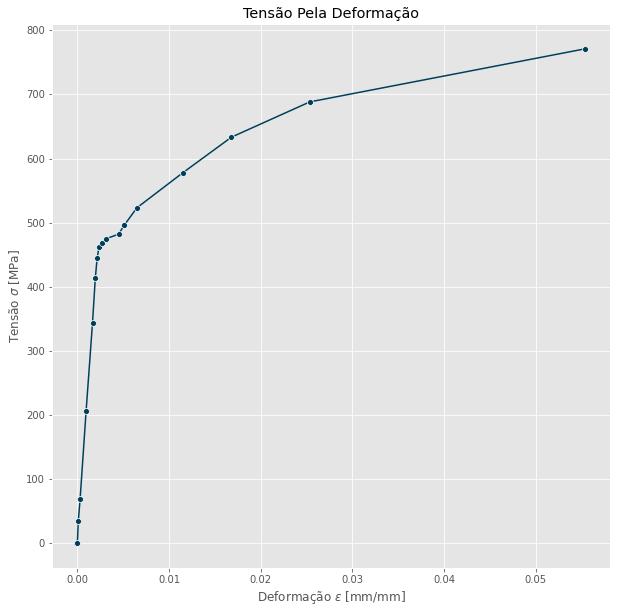

In [203]:
df['Deformação [mm/mm]'] = df['Deslocamento longitudinal [mm]']/comprimento_inicial
df['Tensão [MPa]'] = 1000*(df['Carga [kN]']/(np.pi*((diametro_inicial/2)**2)))
df['Deformação lateral [mm/mm]'] = df['Deslocamento lateral [μm]']/(1000*diametro_inicial)
x = df['Deformação [mm/mm]']
y = df['Tensão [MPa]']

fig=plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
_ = sns.lineplot(x=x, y=y, data=df, color='#003f5c', marker='o')
plt.xlabel('Deformação $\epsilon$ [mm/mm]')
plt.ylabel('Tensão $\sigma$ [MPa]')
plt.title('Tensão Pela Deformação')

### Diagrama de Deformação Longitudinal por Deformação Lateral 

Text(0.5, 1.0, 'Deformação Lateral pela Deformação Longitudinal')

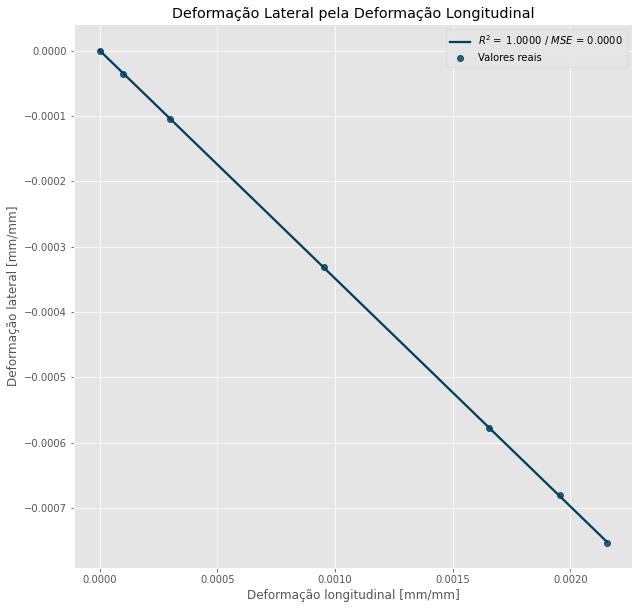

In [196]:
#X = (df.loc[df['Tensão [MPa]']<461, ['Deformação [mm/mm]']])['Deformação [mm/mm]']
#Y = (df.loc[df['Tensão [MPa]']<461, ['Deformação lateral [mm/mm]']])['Deformação lateral [mm/mm]']
df_2 = df.loc[df['Tensão [MPa]']<461]
#display(df_2)
#display(X)
#display(Y)
# Ajustar a função escolhida usando a função curve_fit da biblioteca scipy
[a,b], _= curve_fit(linear_func, df_2['Deformação [mm/mm]'], df_2['Deformação lateral [mm/mm]']) # o _= serve para que a matriz não seja carregada numa variável

# Realizar predição com o modelo de aprendizado de máquina
Y_pred = linear_func(df_2['Deformação [mm/mm]'],a,b)

# Calcular as métricas para avaliar o ajuste do modelo aos dados
'''
As métricas utilizadas neste exemplo são o R^2 e o EQM
Estas métricas estão disponíveis na biblioteca sklearn
'''

r2 = r2_score(df_2['Deformação lateral [mm/mm]'], Y_pred)
mse = mean_squared_error(df_2['Deformação lateral [mm/mm]'], Y_pred)

# Gerar um gráfico do ajuste
fig=plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
#plt.cla()
#plt.plot(X, Y_pred, 'k--')
#plt.scatter(df_2['Deformação [mm/mm]'],df_2['Deformação lateral [mm/mm]'], c='r', marker='o')
_ = sns.regplot(x='Deformação [mm/mm]', y='Deformação lateral [mm/mm]', data=df_2, color='#003f5c', ci=95)
#_ = sns.regplot(x=X, y=Y, data=df, color='#003f5c', ci=95)
plt.xlabel('Deformação longitudinal [mm/mm]')
plt.ylabel('Deformação lateral [mm/mm]')
plt.legend(['$R^2 =$ {:.4f} / $MSE$ = {:.4f}'.format(r2,mse),'Valores reais'])
plt.title('Deformação Lateral pela Deformação Longitudinal')
#plt.title('$Y = {:.4f}X + {:.4f}$'.format(a,b))
#plt.grid()

### Propriedades do material que foram calculadas

In [197]:
coef, cov= np.polyfit(x=df_2['Deformação [mm/mm]'], y=df_2['Tensão [MPa]'], deg=1, cov=True)
E = coef[0]
SY = df.iloc[7]['Tensão [MPa]']
SU = (SY*df.iloc[7]['Deformação [mm/mm]'])/2
print(f'O limite de escoamento é dado por: {SY:.4} MPa')
print(f'O limite de resistência é dado por: {SU:.4} MPa*mm/mm')
print(f'O módulo da elasticidade é dado por: {E:.4} MPa')
print(f'Reta obtida da regressão: y = {a:.3}x + {b:.3}')
print(f'O valor do Coeficiente de Poisson é {-a:.3}')
G = E/(2*(1-a))
print(f'O valor do Módulo de Elasticidade Transversal é {G:.3}')

O limite de escoamento é dado por: 461.3 MPa
O limite de resistência é dado por: 0.543 MPa*mm/mm
O módulo da elasticidade é dado por: 2.048e+05 MPa
Reta obtida da regressão: y = -0.349x + 8.21e-07
O valor do Coeficiente de Poisson é 0.349
O valor do Módulo de Elasticidade Transversal é 7.59e+04


# Questão 2

## Dados Iniciais da Questão 2

In [198]:
a = 330 # mm
b = 235 # mm
δ = 0.08 # mm
T0 = 40 # ºC

## Letra A: pesquisa de propriedades mecânicas

In [199]:
propriedades = {'Aço': [193, 0.27, 17*(10**(-6)), 207], 
                'Cobre': [101, 0.35, 18*(10**(-6)), 70.0],
                'Alumínio': [73.1, 0.35, 23*(10**(-6)), 414]}
Aco_elasticidade = 193 # MPa
Cu_elasticidade = 101 # MPa
Al_elasticidade = 73.1 # MPa
Aco_poisson = 0.27
Cu_poisson = 0.35
Al_poisson = 0.35
Aco_dilatacao = 17*(10**(-6)) # 1/ºC
Cu_dilatacao = 18*(10**(-6)) # 1/ºC
Al_dilatacao = 23*(10**(-6)) # 1/ºC
Aco_escoamento = 207 # MPa
Cu_escoamento = 70.0 # MPa
Al_escoamento = 414 # MPa

## Letra B:

Usando as expressões analíticas calculadas no relatório, pode-se calcular T1 e a folga para cada metal de interesse:

In [200]:
for i in propriedades:
  T1 = -δ/(propriedades[i][2]*b) + T0
  δy = δ*((a/b)-1)
  print(f'A Temperatura 1 para o {i} é {T1:.4} ºC')
  print(f'A Folga para o {i} é {δy:.4} mm\n')

A Temperatura 1 para o Aço é 19.97 ºC
A Folga para o Aço é 0.03234 mm

A Temperatura 1 para o Cobre é 21.09 ºC
A Folga para o Cobre é 0.03234 mm

A Temperatura 1 para o Alumínio é 25.2 ºC
A Folga para o Alumínio é 0.03234 mm



## Letra C:

In [201]:
for i in propriedades:
  T2 = (δ*(a-b))/(propriedades[i][2]*(a*b-a*δ)) - δ/(propriedades[i][2]*b) + T0
  σx = -((propriedades[i][0])*δ*(a-b))/(a*b-a*δ)
  print(f'A Temperatura 2 para o {i} é {T2:.4} ºC')
  print(f'A tensão em x (σx) para o {i} é {σx:.4} MPa\n')

A Temperatura 2 para o Aço é 25.74 ºC
A tensão em x (σx) para o Aço é -0.01892 MPa

A Temperatura 2 para o Cobre é 26.53 ºC
A tensão em x (σx) para o Cobre é -0.009902 MPa

A Temperatura 2 para o Alumínio é 29.46 ºC
A tensão em x (σx) para o Alumínio é -0.007166 MPa



In [202]:
coef, cov= np.polyfit(x=df_2['Deformação [mm/mm]'], y=df_2['Tensão [MPa]'], deg=1, cov=True)
print(coef[0])
print(coef[1])
print(cov)
print(np.sqrt(np.diag(cov)))

204774.65932309564
7.613421128932509
[[ 6.56395929e+06 -6.67477938e+03]
 [-6.67477938e+03  1.14503504e+01]]
[2562.02249976    3.38383664]
